# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('../data/raw/pima-indians-diabetes.csv')

In [5]:
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [7]:
#Colocamos los titulos correctos a las columnas
df_diabetes.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Exploración de datos

In [ ]:
#Visualizacion del dataframe


In [ ]:
#Renombramos las columnas


In [8]:
#Verificacion de datos
df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [9]:
#Analizamos el shape del objeto
df_diabetes.shape

(767, 9)

In [10]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [13]:
#Separamos en X e y
X = df_diabetes.drop('class', axis=1) #axis = 1 nos indica que es una columna
y = df_diabetes['class']


In [14]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train shape: (536, 8)
X_test shape: (231, 8)
y_train shape: (536,)
y_test shape: (231,)


/tmp/ipykernel_9693/1875012395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_diabetes, palette='Set2')


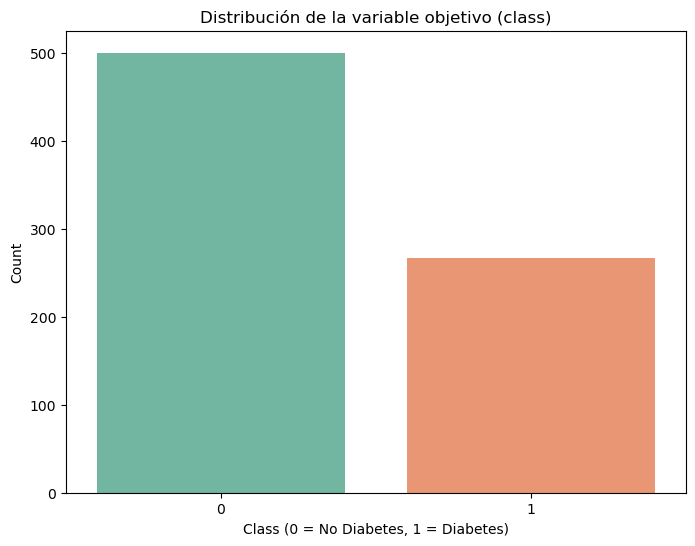

In [15]:
#Visualizamos los shapes de los datos de entrenamiento y prueba
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#Graficamos la distribucion de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df_diabetes, palette='Set2')
plt.title('Distribución de la variable objetivo (class)')
plt.xlabel('Class (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

In [20]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
model = RandomForestClassifier(n_estimators=10, random_state=42)



In [21]:
#Entrenamiento
model.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#Calculo de las predicciones en Train y Test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#Imprimimos las predicciones
print("Predicciones en Train:", y_train_pred)
print("Predicciones en Test:", y_test_pred)

Predicciones en Train: [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1

## Evaluación del modelo

In [23]:
#Evaluaremos el modelo mediante el calculo de metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy en Train:", train_accuracy)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy en Test:", test_accuracy)

#Reporte de clasificacion
print("Reporte de Clasificación en Test:")
print(classification_report(y_test, y_test_pred))

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión en Test:")
print(conf_matrix)

Accuracy en Train: 0.9944029850746269
Accuracy en Test: 0.7316017316017316
Reporte de Clasificación en Test:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.63      0.54      0.58        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.73       231

Matriz de Confusión en Test:
[[126  25]
 [ 37  43]]


In [26]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {'Feature': list(X.columns), 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)


# Mostrar
feature_importances_df

,Feature,Importance
1,plas,0.251010
5,mass,0.143227
7,age,0.141232
6,pedi,0.132584
0,preg,0.104101
4,test,0.083910
2,pres,0.076752
3,skin,0.067183


/tmp/ipykernel_9693/449073607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_df.Feature, y=feature_importances_df.Importance, palette='viridis')


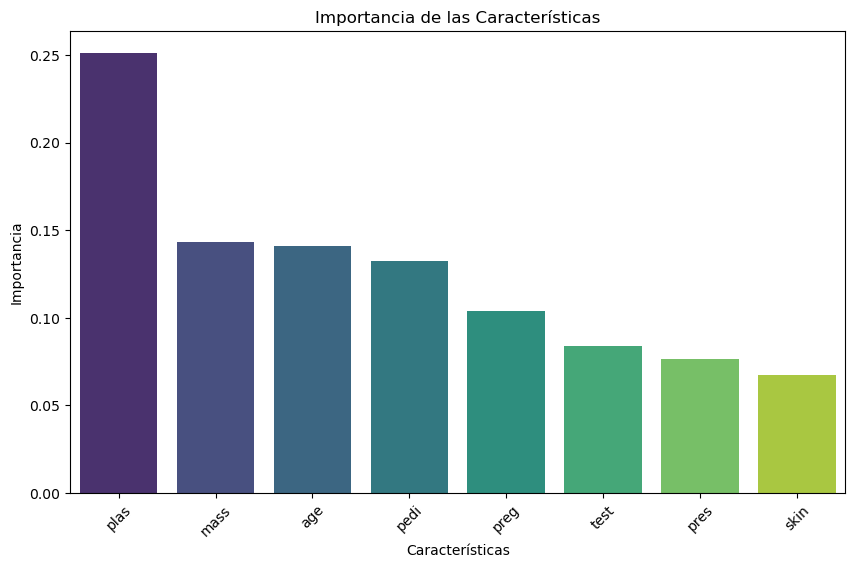

In [28]:
#Visulaizamos los feature importances de maenra grafica
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_df.Feature, y=feature_importances_df.Importance, palette='viridis')
plt.title('Importancia de las Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.show()

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**